# Lab2: Static Word Embeddings

## Static word Embeddings
In class you discussed how there are models like **GloVe**, **Word2Vec** and **fastText** that, when trained on a corpus, produce a vectorial representation of words based on the context. These models produce what are called static embeddings, meaning that there is a singular vector for each word that is a weighted average of all the meanings that the word can have.

For example, the word **right** can have different meanings:

1.   It looks **right** -> right as in correct
2.   The phone is on your **right** -> right as in position

But we will get a single vector for the word **right**, which includes both meanings.


**Useful NLP libraries**

There are many useful python NLP libraries:


* [NLTK](https://www.nltk.org), Natural Language Toolkit is a platform that includes many resources for building Python programs and models to work with text.  Here can be found datasets and libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.
* [SpaCy](https://spacy.io), which is a library useful for creating models, chatbots, and programs for document and text analysis (part-of-speech tagging, dependency parsing, text categorization, named entity recognition).
* [HuggingFace 🤗](https://huggingface.co), that is a machine learning and data science platform useful for building, deployment, and training of machine learning models.
* [Gensim](https://radimrehurek.com/gensim/auto_examples/index.html#other-resources), which is library for topic modeling, information retrieval and other natural language processing resources, models and functionalities. This library also offers models to train word vectors, like Word2Vec and FastText.

In this lab we will work with **Gensim**, **NLTK** and **SpaCy**.


### Preparing the environment

In [ ]:
# to begin with we have to first install the library
# !pip install gensim
# !pip install networkx[default]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 621.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 7.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


Since some packages were re-installed, we have to restart the session, or we are going to get some errors.
This can be done either by going on **Runtime** in the menu and selecting **Restart session**, or by running the piece of code in the next cell.


In [ ]:
# restart session
# import os
# os.kill(os.getpid(), 9)

We can now proceed with importing the libraries

In [ ]:
import gensim
# gensim.downloader is an API for downloading, getting information and loading datasets and models
import gensim.downloader as api

And download the additional datasets that we're going to use

In [ ]:
!git clone https://github.com/elsartori/Lab_2_datasets.git

Cloning into 'Lab_2_datasets'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 28 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (28/28), 27.52 MiB | 24.46 MiB/s, done.
Resolving deltas: 100% (7/7), done.


## Pre-trained embeddings
It is not always necessary to create word embeddings from scratch, but we can use pre-trained embeddings, already created embeddings that we just need to load.
Using pre-trained embeddings allows us to work with embeddings without the need to 1) find a corpora and 2) pre-process it and train word vector models.


In [ ]:
# let's explore what corpora and pre-trained Gensim offers
api.info()

{'corpora': {'semeval-2016-2017-task3-subtaskBC': {'num_records': -1,
   'record_format': 'dict',
   'file_size': 6344358,
   'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/semeval-2016-2017-task3-subtaskB-eng/__init__.py',
   'license': 'All files released for the task are free for general research use',
   'fields': {'2016-train': ['...'],
    '2016-dev': ['...'],
    '2017-test': ['...'],
    '2016-test': ['...']},
   'description': 'SemEval 2016 / 2017 Task 3 Subtask B and C datasets contain train+development (317 original questions, 3,169 related questions, and 31,690 comments), and test datasets in English. The description of the tasks and the collected data is given in sections 3 and 4.1 of the task paper http://alt.qcri.org/semeval2016/task3/data/uploads/semeval2016-task3-report.pdf linked in section “Papers” of https://github.com/RaRe-Technologies/gensim-data/issues/18.',
   'checksum': '701ea67acd82e75f95e1d8e62fb0ad29',
   'file_name': 'se

The information is stored within a long dictionary of dictionaries, and is quite difficult to read. We can select to visualize only a part of the information.

In [ ]:
# check primary keys of dictionary
api.info().keys()

dict_keys(['corpora', 'models'])

In [ ]:
# let's see which corpora are present
api.info()['corpora'].keys()

dict_keys(['semeval-2016-2017-task3-subtaskBC', 'semeval-2016-2017-task3-subtaskA-unannotated', 'patent-2017', 'quora-duplicate-questions', 'wiki-english-20171001', 'text8', 'fake-news', '20-newsgroups', '__testing_matrix-synopsis', '__testing_multipart-matrix-synopsis'])

In [ ]:
# let's visualize more information about corpora "text8"
api.info('text8')

{'num_records': 1701,
 'record_format': 'list of str (tokens)',
 'file_size': 33182058,
 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/text8/__init__.py',
 'license': 'not found',
 'description': 'First 100,000,000 bytes of plain text from Wikipedia. Used for testing purposes; see wiki-english-* for proper full Wikipedia datasets.',
 'checksum': '68799af40b6bda07dfa47a32612e5364',
 'file_name': 'text8.gz',
 'read_more': ['http://mattmahoney.net/dc/textdata.html'],
 'parts': 1}

Pre-trained embeddings are under the key **model**.

In [ ]:
# let's see which pre-trained embeddings are present
api.info()['models'].keys()

dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])

In [ ]:
# let's visualize more information about word vectors 'glove-wiki-gigaword-300'
api.info('glove-wiki-gigaword-300')

{'num_records': 400000,
 'file_size': 394362229,
 'base_dataset': 'Wikipedia 2014 + Gigaword 5 (6B tokens, uncased)',
 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/glove-wiki-gigaword-300/__init__.py',
 'license': 'http://opendatacommons.org/licenses/pddl/',
 'parameters': {'dimension': 300},
 'description': 'Pre-trained vectors based on Wikipedia 2014 + Gigaword, 5.6B tokens, 400K vocab, uncased (https://nlp.stanford.edu/projects/glove/).',
 'preprocessing': 'Converted to w2v format with `python -m gensim.scripts.glove2word2vec -i <fname> -o glove-wiki-gigaword-300.txt`.',
 'read_more': ['https://nlp.stanford.edu/projects/glove/',
  'https://nlp.stanford.edu/pubs/glove.pdf'],
 'checksum': '29e9329ac2241937d55b852e8284e89b',
 'file_name': 'glove-wiki-gigaword-300.gz',
 'parts': 1}

In [ ]:
# we load the embeddings
embeddings = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
embeddings

We are loading a structure called [KeyedVectors](https://radimrehurek.com/gensim/models/keyedvectors.html) and not a model. KeyedVectors do not support additional training but require less RAM than a full model. It is essentially a mapping between keys, in this case **words**, and their **vectors**.

There are two properties to access those mappings:
* ```key_to_index```, that  returns a dictionary which maps a word present in the vocabulary to its index.
* ```index_to_key```, that  returns a dictionary which maps a vocabulary index to a word present in the vocabulary.


In [ ]:
# the dictionary is usually sorted by index. The lower the index, the more common the word was in the corpora.
embeddings.key_to_index

{'the': 0,
 ',': 1,
 '.': 2,
 'of': 3,
 'to': 4,
 'and': 5,
 'in': 6,
 'a': 7,
 '"': 8,
 "'s": 9,
 'for': 10,
 '-': 11,
 'that': 12,
 'on': 13,
 'is': 14,
 'was': 15,
 'said': 16,
 'with': 17,
 'he': 18,
 'as': 19,
 'it': 20,
 'by': 21,
 'at': 22,
 '(': 23,
 ')': 24,
 'from': 25,
 'his': 26,
 "''": 27,
 '``': 28,
 'an': 29,
 'be': 30,
 'has': 31,
 'are': 32,
 'have': 33,
 'but': 34,
 'were': 35,
 'not': 36,
 'this': 37,
 'who': 38,
 'they': 39,
 'had': 40,
 'i': 41,
 'which': 42,
 'will': 43,
 'their': 44,
 ':': 45,
 'or': 46,
 'its': 47,
 'one': 48,
 'after': 49,
 'new': 50,
 'been': 51,
 'also': 52,
 'we': 53,
 'would': 54,
 'two': 55,
 'more': 56,
 "'": 57,
 'first': 58,
 'about': 59,
 'up': 60,
 'when': 61,
 'year': 62,
 'there': 63,
 'all': 64,
 '--': 65,
 'out': 66,
 'she': 67,
 'other': 68,
 'people': 69,
 "n't": 70,
 'her': 71,
 'percent': 72,
 'than': 73,
 'over': 74,
 'into': 75,
 'last': 76,
 'some': 77,
 'government': 78,
 'time': 79,
 '$': 80,
 'you': 81,
 'years': 82,
 'i

In [ ]:
# we can check if a word is present in the vocabulary
print("people" in embeddings)
# we can also print its shape. The lenght of our vector is 300
print(embeddings['people'].shape)
# we can check the index of a single word
print(embeddings.key_to_index['people'])
# we can check the word associated to a specific index
print(embeddings.index_to_key[69])

True
(300,)
69
people


We can access vectors both by using a key or an index.

In [ ]:
# let's check the first 30 positions of the vectors.
embeddings['people'][0:30]

array([-0.41355  ,  0.076012 ,  0.099178 , -0.01195  ,  0.018657 ,
        0.050379 , -0.03678  ,  0.45022  ,  0.039699 , -1.8194   ,
       -0.0034032, -0.45506  ,  0.030772 ,  0.33461  ,  0.15492  ,
        0.25854  , -0.026736 ,  0.444    ,  0.023157 ,  0.35519  ,
        0.12143  ,  0.63859  ,  0.47899  ,  0.12928  , -0.49584  ,
        0.10562  ,  0.09496  ,  0.038941 ,  0.29463  , -0.26588  ],
      dtype=float32)

In [ ]:
embeddings[69][0:30]

array([-0.41355  ,  0.076012 ,  0.099178 , -0.01195  ,  0.018657 ,
        0.050379 , -0.03678  ,  0.45022  ,  0.039699 , -1.8194   ,
       -0.0034032, -0.45506  ,  0.030772 ,  0.33461  ,  0.15492  ,
        0.25854  , -0.026736 ,  0.444    ,  0.023157 ,  0.35519  ,
        0.12143  ,  0.63859  ,  0.47899  ,  0.12928  , -0.49584  ,
        0.10562  ,  0.09496  ,  0.038941 ,  0.29463  , -0.26588  ],
      dtype=float32)

As you can see the vector is stored as a NumPy array. [NumPy](https://numpy.org/doc/stable/) is a library used for working with arrays. We can use it to check if the vectors are equal.

In [ ]:
# import library
import numpy as np
# we check if two arrays have the same shape and elements
np.array_equal(embeddings['people'],embeddings[69])

True

The values are the same!
We can also extract multiple embeddings, we are not limited to one.

In [ ]:
multiple_embeddings = embeddings['people','men', 'women']
# check array shape, it has 2 dimensions (n_words * vectors_lenght)
print(multiple_embeddings.shape)
# the order of extraction is the same as the order of the words
print(np.array_equal(embeddings['people'], multiple_embeddings[0]))
print(np.array_equal(embeddings['men'], multiple_embeddings[1]))
print(np.array_equal(embeddings['women'], multiple_embeddings[2]))

(3, 300)
True
True
True


We can check how similar two vectors are using the cosine similarity.
Gensim offers functions to do just that:


*   [```similarity```](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.similarity) computes the cosine similarities between two words in the vocabulary.
*   [```cosine_similarities```](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.cosine_similarities) works on vectors, and computes the cosine similarities between one vector and an array of other vectors.

Otherwise it is possible to use sklearn function [`cosine_similarity`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html).

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# single words
print(embeddings.similarity("women", "men"))
print(embeddings.similarity("people", "men"))
print(embeddings.similarity("people", "women"))
print(embeddings.similarity("people", "children"))
print(cosine_similarity([embeddings["people"]], embeddings[["children"]]))
# multiple words
print(embeddings.cosine_similarities(embeddings["people"], embeddings["men", "women", "children"]))
cosine_similarity(embeddings["people","men"], embeddings["men", "women", "children"])

0.76569206
0.48726866
0.4911429
0.57330215
[[0.5733021]]
[0.48726875 0.4911429  0.57330215]


array([[0.4872689 , 0.4911428 , 0.57330215],
       [0.99999994, 0.76569206, 0.39482746]], dtype=float32)

In [ ]:
# the output is an array, but we can convert it into a list
print(cosine_similarity(embeddings["people", "men"], embeddings["men", "women", "children"]).tolist())

[[0.4872688949108124, 0.49114280939102173, 0.573302149772644], [0.9999999403953552, 0.7656920552253723, 0.3948274552822113]]


It can also be useful to check for possible biases in the dataset

In [ ]:
print(embeddings.cosine_similarities(embeddings["soldier"], embeddings["men","women"]))

[0.36857778 0.16969022]


We can also check how dissimilar two vectors are using the cosine distance. This is equal to ```1 - cosine_similarity```.

There are specific Gensim functions to achieve that:


*   [```distance```](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.distance) computes the cosine similarities between two words in the vocabulary
*   [```distances```](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.distances) computes the cosine similarities between one word and a list of other words

Otherwise it is possible to use sklearn function [`cosine_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_distances.html).

In [ ]:
from sklearn.metrics.pairwise import cosine_distances
# single words
print(embeddings.distance("people", "men"))
print(embeddings.distance("people", "women"))
print(embeddings.distance("people", "children"))
print(cosine_distances([embeddings["people"]], [embeddings["children"]]))
# multiple words
print(embeddings.distances("people", ["men","women","children"]))
print(cosine_distances([embeddings["people"]], embeddings["men", "women", "children"]))

0.5127313435077667
0.5088571012020111
0.42669785022735596
[[0.4266979]]
[0.51273125 0.50885713 0.42669785]
[[0.51273143 0.5088572  0.42669797]]


Another useful Gensim function is [`most_similar`](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar), that finds the top-n most similar keys.
The most important arguments are:
* ```positive [str or list] ``` : required, word or list of words that contribute positively (sum).
* ```negative [str or list] ``` : optional, list of words that contribute negatively (difference).
* ```topn [int] ```: optional shows only the n most similar words, the default is 10
* ```restrict_vocab [int] ```: optional checks only the first vectors in the vocabulary order.

In [ ]:
words_of_interest = ["people", "men", "women", "children"]
for word in words_of_interest:
  print("Most similar words to {}:".format(word), embeddings.most_similar(positive=word))
  # it is not necessary to explict 'positive', the following command works too: embeddings.most_similar(word))

Most similar words to people: [('others', 0.6869413256645203), ('those', 0.6751999855041504), ('least', 0.6725972294807434), ('many', 0.6488873958587646), ('some', 0.6473506093025208), ('all', 0.6324364542961121), ('them', 0.6265104413032532), ('thousands', 0.6232550144195557), ('hundreds', 0.621068000793457), ('there', 0.6197642087936401)]
Most similar words to men: [('women', 0.7656920552253723), ('man', 0.5819568037986755), ('soldiers', 0.5340594053268433), ('who', 0.5212128758430481), ('boys', 0.515128493309021), ('young', 0.5093550086021423), ('male', 0.5081119537353516), ('they', 0.5072554349899292), ('girls', 0.5066787600517273), ('four', 0.4968618154525757)]
Most similar words to women: [('men', 0.7656920552253723), ('girls', 0.6347202062606812), ('female', 0.6183490753173828), ('woman', 0.604761004447937), ('male', 0.549830436706543), ('mothers', 0.5313720703125), ('athletes', 0.5268537402153015), ('she', 0.5137521028518677), ('young', 0.5133211016654968), ('children', 0.50796

##Embedding visualization
In some cases we would like to visualize the embeddings we are working on. For example we may want to verify if each word in **words_of_interest** is close to their most similar embeddings, but the word vectors we chose have 300 dimensions!

In these cases, we can use dimensionality reduction techniques, such as PCA, to map the data into a lower-dimensional space.

In [ ]:
from sklearn.decomposition import PCA
# pandas is a library for data analysis and manipulation, use particularly for tabular data (like in an excel)
import pandas as pd
import numpy as np
import plotly.express as px

words_of_interest = ["people", "men", "women", "children"]
# we make a single array with the top10 most similar words to those in words_of_interest
clusters=[]
for word in words_of_interest:
  clusters.extend([k for k,v in embeddings.most_similar(word)])

# we perform PCA on the list of top10 words
pca = PCA(n_components=3) #Perform 3d-PCA
embeddings_pca = pca.fit_transform(embeddings[clusters])

# we save the results of PCA in a dataframe (tabular format)
pca_df = pd.DataFrame(embeddings_pca, columns=["pca_x", "pca_y", "pca_z"])
# we add a column 'word' with the corresponding top10 words for each coordinates
pca_df["word"] = clusters
# we add a column 'word_of_interest' with the most similar word in words_of_interest
labels = np.array(words_of_interest).repeat(10)
pca_df["word_of_interest"] = labels

# we visualize the first 10 rows of the dataframe
print(pca_df.head(10))
# we create a plot
px.scatter_3d(pca_df, x='pca_x', y='pca_y', z='pca_z', color="word_of_interest", text="word", opacity=0.7, title="3d-PCA representation of word embeddings")

      pca_x     pca_y     pca_z       word word_of_interest
0 -2.258326  0.224891  0.214741     others           people
1 -2.401894  0.370787 -0.098497      those           people
2 -2.437698 -0.281364  0.034983      least           people
3 -2.803548  0.351857  0.026790       many           people
4 -2.997281  0.086209 -0.260804       some           people
5 -2.344112 -0.103569 -0.783273        all           people
6 -2.186095  0.392150 -0.340698       them           people
7 -3.144876  1.094646  0.976584  thousands           people
8 -3.135203  0.937666  0.556546   hundreds           people
9 -2.373469 -0.073514 -0.611271      there           people


## Word embedding evaluation

There are two main types of evaluation for word embeddings:
   
   * **intrisic evaluation**: where we evaluate word embeddings on the embedding space
        * word similarity benchmarks
        * word analogy benchmarks
   * **extrinsic evaluation**: where we evaluate word embeddings on a downstream task, like text classification.


We will see how intrisic evaluation works.

###Word Similarity benchmarks

Word similarity benchmarks, are datasets that contain pairs of words and a similarity score between each, given by human heuristic judgments. The higher the correlation between the assigned human similarity score and the actual similarity between the obtained embeddings, the better the embeddings are.


One of these datasets is [MEN](https://staff.fnwi.uva.nl/e.bruni/MEN) that contains a total of 3000 scored pairs.


In [ ]:
import pandas as pd
# we read MEN as a dataframe
ws_df = pd.read_csv('/content/Lab_2_datasets/men.csv', sep=",")
# let's see a portion of the dataset
ws_df.sample(10)

,word1,word2,similarity
2557,alley,bloom,10.0
2827,aerial,violet,6.0
1410,line,metro,27.0
1160,cliff,waterfall,30.0
329,lingerie,sexy,41.0
1699,misty,mountain,23.0
2880,garage,mammal,5.0
1912,leave,stop,19.0
1879,farm,wind,20.0
1652,dirty,feel,23.0


To evaluate word embeddings on a word similarity benchmark, we need to do these steps:

1. For each pair of words $(w_{i_{1}}, w_{i_{2}})$ in the benchmark, we compute the cosine similarity between its word embeddings $\cos(\mathbf{e}_{w_{i_{1}}}, \mathbf{e}_{w_{i_{2}}})$
2. We compute a correlation score (like [Pearson's $r$](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) or [Spearman's $\rho$](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)) between the human given scores and the cosine similarities between the embeddings
    - the higher the score, the better!

Gensim has a function that does all of that: [```evaluate_word_pairs```](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.evaluate_word_pairs), it computes the correlation between the model with human similarity judgments in a dataset.

In [ ]:
embeddings.evaluate_word_pairs('/content/Lab_2_datasets/men.csv', delimiter=',')

(PearsonRResult(statistic=0.7297760672343426, pvalue=0.0),
 SignificanceResult(statistic=0.7374646969805516, pvalue=0.0),
 0.0)

### Word Analogy benchmarks

Word analogy benchmarks are datasets that contain groups of four words that are related in some way.  The evaluation of the embeddings is based on the idea that this relations can be predicted by arithmetic operations in the vectorial space.

Given $\mathbf{e}_x$ to be the embedding of word $x$, examples of the relations that can be found in these datasets and how they are verified are:

*    man : king = woman : queen -> $\mathbf{e}_{king} - \mathbf{e}_{man} + \mathbf{e}_{woman} = \mathbf{e}_x$ where $x$ is checked to be $queen$.
*    miss : woman = mr : man -> $\mathbf{e}_{woman} - \mathbf{e}_{miss} + \mathbf{e}_{mr} = \mathbf{e}_x$ where $x=man$
*    athens : greece = madrid : spain -> $\mathbf{e}_{greece} - \mathbf{e}_{athens} + \mathbf{e}_{madrid} = \mathbf{e}_x$ where $x=spain$


To verify these relations we can use Gensim `most_similar` function, that we already saw. Word embedding that we would sum together are those that **contribute positively**, the one that we subtract have a **negative contribution**.

In [ ]:
print(embeddings.most_similar(positive=["king", "woman"], negative=["man"]))
print(embeddings.most_similar(positive=["woman", "mr"], negative=["miss"]))
print(embeddings.most_similar(positive=["greece", "madrid"], negative=["athens"]))

[('queen', 0.6713277101516724), ('princess', 0.5432624816894531), ('throne', 0.5386103987693787), ('monarch', 0.5347574949264526), ('daughter', 0.49802514910697937), ('mother', 0.49564430117607117), ('elizabeth', 0.4832652509212494), ('kingdom', 0.47747090458869934), ('prince', 0.4668239951133728), ('wife', 0.46473270654678345)]
[('man', 0.524929404258728), ('mr.', 0.4656229615211487), ('husband', 0.41522544622421265), ('person', 0.4119868576526642), ('surnamed', 0.40376853942871094), ('businessman', 0.38730764389038086), ('father', 0.385066956281662), ('himself', 0.3838663697242737), ('mrs', 0.3825554847717285), ('servant', 0.3816758692264557)]
[('spain', 0.7184895277023315), ('portugal', 0.5856315493583679), ('valencia', 0.5343517065048218), ('atletico', 0.5164921283721924), ('argentina', 0.5135518312454224), ('spanish', 0.5101865530014038), ('barcelona', 0.5093894004821777), ('italy', 0.5003106594085693), ('morocco', 0.47494179010391235), ('sevilla', 0.46224895119667053)]


We will use a subset of the [SemEval 2017](https://alt.qcri.org/semeval2017/task2/) benchmark that contains 4998 relations. The original dataset contains 10014 entries for the English language.

In [ ]:
#we open and visualize a portion of the dataset
f = open('/content/Lab_2_datasets/semeval.txt')
print("".join(f.readlines()[:10]))
f.close()

: semeval-analogies
water drop hour seconds
mile yard hour seconds
time moment hour seconds
water drop feet inches
mile yard feet inches
time moment feet inches
water drop foot inch
mile yard foot inch
time moment foot inch



Instead of running `most_similar` on each entry, we can use the built-in function [`evaluate_word_analogies`](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.evaluate_word_analogies) which computes the performance of the model over an analogy test set.

In [ ]:
accuracy, results = embeddings.evaluate_word_analogies('/content/Lab_2_datasets/semeval.txt')
print("Accuracy ", accuracy)
print(results[0].keys())
print("Correct ", len(results[0]['correct']) ,results[0]['correct'][:5])
print("Incorrect" , len(results[0]['incorrect']) , results[0]['incorrect'][:5])

Accuracy  0.017575757575757574
dict_keys(['section', 'correct', 'incorrect'])
Correct  87 [('WATER', 'DROP', 'DAY', 'WEEK'), ('MILE', 'YARD', 'DAY', 'WEEK'), ('BRIGHTEN', 'COLOR', 'ACCELERATION', 'SPEED'), ('CRESCENDO', 'SOUND', 'DARKEN', 'COLOR'), ('CRESCENDO', 'SOUND', 'FLOOD', 'WATER')]
Incorrect 4863 [('WATER', 'DROP', 'HOUR', 'SECONDS'), ('MILE', 'YARD', 'HOUR', 'SECONDS'), ('TIME', 'MOMENT', 'HOUR', 'SECONDS'), ('WATER', 'DROP', 'FEET', 'INCHES'), ('MILE', 'YARD', 'FEET', 'INCHES')]


#Exercises

##Part1: Working with pre-trained embeddings


**Ex.1**

Find the 10 most similar words (with the highest cosine similarity) to "people", "men", "women" and "children", without using Gensim `most_similar` function. Use the GloVe embeddings saved in `embeddings`.

You might find the function [```numpy.argsort```](https://numpy.org/doc/2.1/reference/generated/numpy.argsort.html) useful.

Previously we obtained the following results:

* Most similar words to `people`: 'others','those','least','many','some','all','them','thousands','hundreds','there'
* Most similar words to `men`: 'women','man','soldiers','who','boys','young','male','they','girls','four'
* Most similar words to `women`: 'men','girls','female','woman','male', 'mothers','athletes','she','young','children'
* Most similar words to `children`: 'parents','child','kids','daughters', 'girls', 'youngsters','mothers','adults','teenagers','babies'

In [ ]:
#Ex 1
words_of_interest = ["people", "men", "women", "children"]

for word in words_of_interest:
  similar=[]
  for w in embeddings.key_to_index:
    similar.append((w,embeddings.similarity(word,w)))
  print("Most similar words to {}:".format(word), [el[0] for el in sorted(similar, reverse=True, key= lambda x: x[1])[1:11]])

Most similar words to people: ['others', 'those', 'least', 'many', 'some', 'all', 'them', 'thousands', 'hundreds', 'there']
Most similar words to men: ['women', 'man', 'soldiers', 'who', 'boys', 'young', 'male', 'they', 'girls', 'four']
Most similar words to women: ['men', 'girls', 'female', 'woman', 'male', 'mothers', 'athletes', 'she', 'young', 'children']
Most similar words to children: ['parents', 'child', 'kids', 'daughters', 'girls', 'youngsters', 'mothers', 'adults', 'teenagers', 'babies']


**Ex.2**

Replicate the instrisic evaluation of the embedding on the MEN benchmark without using the `evaluate_word_pairs` function. If the embedding for a word in a pair is not present, it should be skipped.

To compute the correlations use the functions [```spearmanr```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) and [```pearsonr```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) from ```scipy.stats```, and the GloVe embeddings saved in `embeddings`.


Previously we obtained the following results:

* `PearsonRResult(statistic=0.7297760672817454, pvalue=0.0)`
* ```SignificanceResult(statistic=0.7374646969805516, pvalue=0.0)```




In [ ]:
#Ex.2
from scipy import stats

# compute the cosine similarity among the embeddings for each pair of words in the MEN benchmark, if both are present in the vocabulary.
# If one or both are not present, they should be skipped
# IMPORTANT: if a word pair is skipped, the associated human score should also not be considered
def calcCosineSimilarity(w1,w2):
  if w1 in embeddings and w2 in embeddings:
    return embeddings.similarity(w1,w2)
  else:
    return np.NAN

df=ws_df
df["cosine_similarity"]= df.apply(lambda row: calcCosineSimilarity(row["word1"],row["word2"]),axis=1)

df.dropna(inplace=True)

print("Pr:", stats.pearsonr(df["cosine_similarity"],df["similarity"]))
print("Sr:", stats.spearmanr(df["cosine_similarity"],df["similarity"]))


# compute the correlations using the functions pearsonr and spearmanr
# both functions take array-like data structures (arrays, lists)


Pr: PearsonRResult(statistic=0.7297760672343426, pvalue=0.0)
Sr: SignificanceResult(statistic=0.7374646969805517, pvalue=0.0)


## Part 2 : Training your own embeddings

We will now see how to train your own embeddings. We will use a dataset containing posts during the first year of the pandemic (January-December 2020). In total it contains 63806 entries.

In [ ]:
# let's visualize the dataset
import pandas as pd
# we read the excel into a dataframe and visualize the first rows
covid_df = pd.read_excel('/content/Lab_2_datasets/Covid_dataset_en.xlsx')
covid_df.head()

,PostID,Post Description,Date,Language Code,Full Language,Sentiment
0,B7mbLCVhYIf,QUESTIONS AND ANSWERS ON CORONAVIRUS PT. 2\n\n...,2020-01-21,en,English,positive
1,B7m7M3SgvI1,Using humor to bring attention to a serious ma...,2020-01-22,en,English,negative
2,B7oK_DMhtxr,Stay safe\nCover your face\n#typ262 #40mm #40m...,2020-01-22,en,English,positive
3,B7njeFbBX5y,Did you know an outbreak of a new coronavirus ...,2020-01-22,en,English,negative
4,B7nV26QgOLP,It’s so sad and scary that the coronavirus has...,2020-01-22,en,English,negative


To start we need to 1) lowercase the text and 2) clean the dataset from common characters that might be present. If we don't do this, we risk getting multiple vectors for the same word like: `CORONAVIRUS`, `coronavirus`, `coronavirus.` or `#coronavirus`.

In [ ]:
import re
# we lowercase all entries in the column
covid_df['Post Description'] = covid_df['Post Description'].str.lower()
# we remove common punctuation marks
covid_df['Post Description'] = covid_df['Post Description'].map(lambda x: re.sub('[\[\]()/\-\_#@.!?,;.:]', '', str(x)))
# we remove newline characters
covid_df['Post Description'] = covid_df['Post Description'].map(lambda x: re.sub('\n', ' ', str(x)))
covid_df.head()

,PostID,Post Description,Date,Language Code,Full Language,Sentiment
0,B7mbLCVhYIf,questions and answers on coronavirus pt 2 is ...,2020-01-21,en,English,positive
1,B7m7M3SgvI1,using humor to bring attention to a serious ma...,2020-01-22,en,English,negative
2,B7oK_DMhtxr,stay safe cover your face typ262 40mm 40mmpers...,2020-01-22,en,English,positive
3,B7njeFbBX5y,did you know an outbreak of a new coronavirus ...,2020-01-22,en,English,negative
4,B7nV26QgOLP,it’s so sad and scary that the coronavirus has...,2020-01-22,en,English,negative


Different tasks require different preprocessing techniques. For example, if we were working on sentiment classification we could want to keep punctuation marks that express some degree of emphasis, like `!` or `?`.

Other common preprocessing steps are **stopwords removal** and **stemming** or **lemmatization**.

**Stopwords** are frequently used words that do not have any specific meaning, like `the`, `a`, `an`. As they do not add information, they are generally removed to make processing a text faster and to avoid wasting memory on embeddings that are not important.

**Stemming** and **lemmatization** are two NLP techniques with the goal of reducing the vocabulary size. The goal of these techniques is to reduce multiple forms of a same word to a single one (e.g., `run`, `running`, `runs` -> `run`).

**Stemming** removes all common suffixes from words to obtain the root, however the result can sometimes be a little malformed or straight up incorrect (e.g., `vaccination` -> `vaccin` or `caring` -> `car`)

**Lemmatization**, instead, assigns each word to its base form to a lemma, a regular word that could be found in a dictionary (e.g., `vaccination` -> `vaccine` or `caring` -> `care`). To assign the correct lemma to each word, lemmatizers are usually employed along with POS taggers, as words might assume different lemmas depending on their Part-Of-Speech tag:
* He is **running** away -> running is verb -> lemma=`run`
* **Running** is healthy for you -> running is a noun -> lemma=`running`


In [ ]:
import nltk

# we use nltk list of stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

# sometimes we may want to add additional words to the list, this can be done using the following line of code:
# stop_words.extend(["example"])

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from gensim.test.utils import common_texts
import spacy

# we use spacy lemmatizer
# in addition to a pos tagger, spacy pipeline also includes a parser and named entity recognition
# we won't be using them, so we disable those options
lemma = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# we create a list with all the posts
posts = covid_df['Post Description'].values.tolist()

# we run the lemmatizer and remove words that are stopwords
preprocessed_posts = []
for lemmatized_post in lemma.pipe(covid_df['Post Description']):
    preprocessed_posts.append(" ".join(word.lemma_ for word in lemmatized_post if word.lemma_ not in stop_words))

**Let**'s see what the final result is!

In [ ]:
print("ORIGINAL: ", posts[0])
print("PROCESSED: ", preprocessed_posts[0])

ORIGINAL:  questions and answers on coronavirus pt 2  is there a vaccine for coronavirus  when a disease is new there is no vaccine until one is developed it can take a number of years for a new vaccine to be developed  is there a treatment for a novel coronavirus  there is no specific treatment for disease caused by a novel coronavirus however many of the symptoms can be treated and therefore treatment based on the patient’s clinical condition moreover supportive care for infected persons can be highly effective  what can i do to protect myself  standard recommendations to reduce exposure to and transmission of a range of illnesses include maintaining basic hand and respiratory hygiene and safe food practices  and avoiding close contact when possible with anyone showing symptoms of respiratory illness such as coughing and sneezing  coronavirus coronavirusawareness coronavirusoutbreak
PROCESSED:  question answer coronavirus pt 2   vaccine coronavirus   disease new vaccine one develop t

We can save the preprocessed posts in a new column of the dataframe, for easy access.

In [ ]:
covid_df["preprocessed_posts"] = preprocessed_posts

We can now train our [Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html) Gensim model!
The main arguments are:
* ```sentences [iterable of iterables] ``` : list of lists of tokens (words) from the corpora.
* ```vector_size  [int] ``` : optional, dimension of the word vectors.
* ```window  [int] ```: optional, size of the window.
* ```min_count  [int] ```: optional, ignore words with a total frequency lower than the given value.
* ```seed  [int] ```: optional, set seed for random generator, useful for reproducibility results.
* ```max_vocab_size  [int] ```: optional, limit the maximum size of the learned vocabulary.
* ```workers  [int] ```: optional, number of threads to be used during training. To ensure reproducible results it should be set to 1.
* ```sg  [int] ```: optional 0/1, if 1 skip-gram will be used, otherwise CBOW is used.

**See the documentation for the full list!**

`preprocessed_posts` is a list of strings, but the model takes a list of lists of tokens as input, we have to transform it.

In [ ]:
# we split each string into a list of words
preprocessed_posts = [post.split(" ") for post in preprocessed_posts]

In [ ]:
print(preprocessed_posts)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np

In [ ]:
# we import the model
from gensim.models import Word2Vec

# we set the seeds needed to ensure reproducibility of results
import os
import random
os.environ['PYTHONHASHSEED']=str(123)
np.random.seed(0)
random.seed(0)

# we instantiate the model and training starts automatically
model = Word2Vec(preprocessed_posts, seed=0, window=7, min_count=5, max_final_vocab=50000, vector_size=300, workers=1)
# we can get the trained vectors as KeyedVectors
word_vectors = model.wv

If we are done training and no longer need the full state of the model, we can extract the learned vectors as KeyedVectors and use those directly for faster loading and computation.

In [ ]:
# we can save the model in case we may need it
model.save("word2vec_covid_trained.model")
# to load it back we just use the following instruction
# model = Word2Vec.load("word2vec_covid_trained.model")

# we can also save and load the trained word vectors
word_vectors.save("word2vec_covid_trained.wordvectors")
#from gensim.models import KeyedVectors
#reloaded_word_vectors = KeyedVectors.load('word2vec_covid_trained.wordvectors')

# we delete the model as we don't need to train it further
del model

Let's look at the words most similar to those commonly associated with the coronavirus epidemic.

In [ ]:
print(word_vectors.most_similar('covid', topn=5))
print(word_vectors.most_similar('coronavirus', topn=5))
print(word_vectors.most_similar('pandemic', topn=5))
print(word_vectors.most_similar('epidemic', topn=5))

[('infora', 0.5310555100440979), ('covid19', 0.441947340965271), ('doctor', 0.3995853066444397), ('pandemic2020', 0.3901899755001068), ('real', 0.3816450238227844)]
[('virus', 0.5887094140052795), ('covid19', 0.5254590511322021), ('covidー19', 0.49065518379211426), ('coronaviruspandemic', 0.47719964385032654), ('globally', 0.455029159784317)]
[('crisis', 0.7011563777923584), ('outbreak', 0.6268853545188904), ('fear', 0.47592243552207947), ('situation', 0.4713810682296753), ('challenge', 0.46811795234680176)]
[('contagious', 0.7331619262695312), ('cholera', 0.7315983176231384), ('ebola', 0.727013349533081), ('sar', 0.7135192155838013), ('hiv', 0.6865621209144592)]


We may want to further explore the associations between a word and its nearest neighbors, one way to do this is a 2-hop neighborhood graph. This may be useful to understand how a certain topic has been discussed in a corpora.

To create a 2-hop graph we have to do the following:
1. We start from a `seed`, the central word that we want to build our graph around.
2. We then consider its neighbors.
3. We take the neighbors that are above a certain cosine similarity threshold `thr`. We remove connections that were already considered (so those that link back to the seed word). This is the first hop, where a **hop** is a direct connection between words.
4. We proceed by considering the neighbors of the neighbors.
5. We take those that are above the threshold and were not previously considered. This is the second hop.
6. We build a weighted undirected graph where each node is a word, and the edges are the direct connections between words with the cosine similarity as the weight.

Let's see an example with `seed`=**coronavirus** and `thr`=**0.5**:

1.   We check the neighbors of the word **coronavirus**: ('virus' sim=0.5887, 'covid19' sim=0.5254, 'covidー19' sim=0.4906, 'coronaviruspandemic' sim=0.4771, ...)
2.   We select the neighbors that are above `thr`: **('virus', 'covid19')**
3.   We check the neighbors of the word **virus**: ('disease' sim=0.6745, 'rumor' sim=0.6075, 'contagious' sim=0.5917, '**coronavirus**' sim=0.5887,'sar' sim=0.4910, 'infect' sim=0.4885, 'problem' sim=0.4884, ...)
4.   We select the neighbors that are above `thr`: **('disease', 'rumor', 'contagious')**. We exclude the word **coronavirus** because it is the seed word. We have already considered the connection **coronavirus**-**virus**, if we also consider **virus**-**coronavirus** we are going to have a duplicated edge. This may not be important in small graphs, but in bigger graphs having a lot of duplicated edges can become computationally expensive.
5.   We check the neighbors of the word **covid19**: ('**coronavirus**' sim=0.5254, 'covidー19' sim=0.4463, 'covid' sim=0.4419, ...)
6.   We select the neighbors that are above `thr` and were not previously considered: **('covidー19')**
7.   We build the following graph:
    

  ```
                                  node1  -  node2  -  weight
                              ---------------------------------
                              coronavirus   virus      0.5887
                              coronavirus  covid19     0.5254
                                 virus     disease     0.6745
                                 virus      rumor      0.6075
                                 virus    contagious   0.5917
                                covid19    covid-19    0.4463
  ```




You can also build a 2-hop graph starting from multiple related seeds.

Ex.3

Create a two-hop graph starting from the word `pandemic` and considering only words that have a cosine similarity threshold above or equal to `0.6`.

The code to build the graph is already present, you should save the connections as a list of lists with format `[[word1, word2, sim(word1, word2)][word1, word3, sim(word1, word3)]...]` in a variable called `edges`.

You should obtain something like the following image:

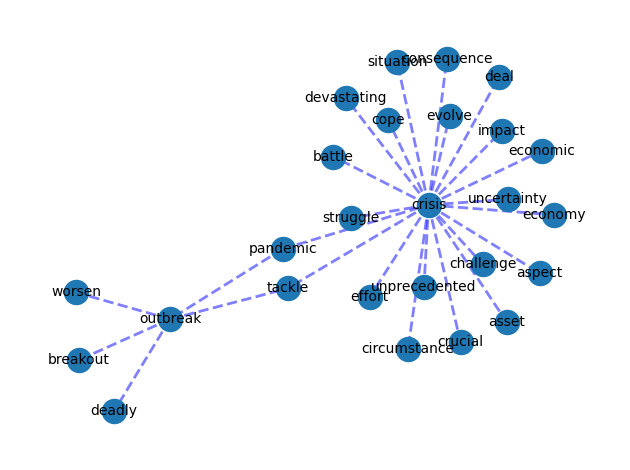

In [ ]:
#Ex.3
seed = "pandemic"

# determine edges for the graph

first=[[seed, edge[0], edge[1]] for edge in word_vectors.most_similar(seed) if edge[1] >= 0.6]
second=[]
for el in first:
  for word in word_vectors.most_similar(el[1],topn=100):
    if word[1] >= 0.6:
      second.append([el[1],word[0],word[1]])

edges= first+second

print("----Exercise 3----")
print(edges[0:10])
print("----End of Exercise 3----")

----Exercise 3----
[['pandemic', 'crisis', 0.7011563777923584], ['pandemic', 'outbreak', 0.6268853545188904], ['crisis', 'unprecedented', 0.7680164575576782], ['crisis', 'challenge', 0.7570127248764038], ['crisis', 'impact', 0.7041661143302917], ['crisis', 'pandemic', 0.7011563777923584], ['crisis', 'uncertainty', 0.6811140179634094], ['crisis', 'evolve', 0.6650441884994507], ['crisis', 'economic', 0.6622275114059448], ['crisis', 'effort', 0.655460774898529]]
----End of Exercise 3----


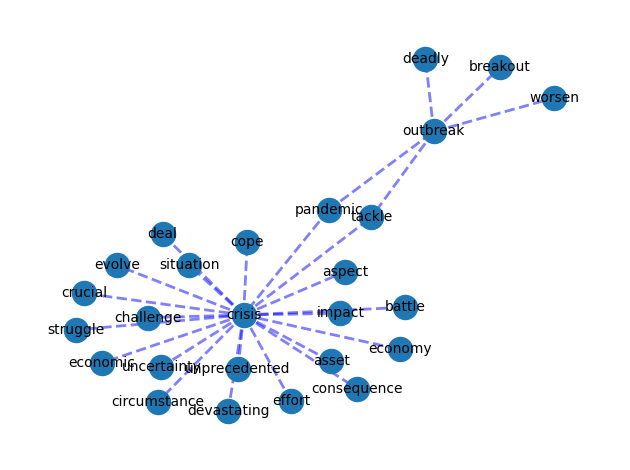

In [ ]:
#PLOT GRAPH
# There is no need to add anything, but feel free to play around with it! (https://networkx.org/documentation/stable/tutorial.html)
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

for edge in edges:
 G.add_edge(edge[0], edge[1], weight=edge[2])

# we differentiate the edges between words with a very strong association (cosine similarity >= 0.8) from the rest
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] >= 0.8]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] < 0.8]

# positions for all nodes - seed for reproducibility
pos = nx.spring_layout(G, seed=7)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=300)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=3)
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=2, alpha=0.5, edge_color="b", style="dashed")

# node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

# plot
ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

Ex.4

We will now split the dataset of covid posts and train two Word2Vec models:
*   `model_first_months` on posts from the start of January to the end of June;
*   `model_last_months` on posts from the start of July up until the end of December.

You are also given a list of terms named `vocabs` = ['covid', 'coronavirus', 'covid19', 'corona', 'pandemic', 'epidemic', 'outbreak', 'lockdown', 'quarantine', 'mental', 'vaccine', 'vaccination', 'virus', 'sick',
 'ill', 'illness' ,'testing', 'hospital', 'doctor', 'doctors', 'nurse', 'nurses', 'medic', 'medical', 'medicine', 'prevention', 'health', 'safe',
 'care', 'worry', 'recession', 'job', 'life', 'live', 'school']


The exercise consists in:
1.   Instantiate and train the Word2Vec models
2.   Take each term in vocabs and compare it in the following way:
      * get the list of **50** most similar words from `model_first_months`
      * get the list of **50** most similar words from `model_last_months`
      * count the words in common between the two
3.   Extract the 10 words that changed the most, the ones that have the lowest number of common words between the models
4.   Save the 10 words as a list in a variable called `ten_most_changed`

Remember that we previously saved the preprossed posts in the column 'preprocessed_posts'.


Both Word2Vec models must have the following paramenters:
* seed=0
* window=5
* min_count=5
* max_final_vocab=50000
* vector_size=300
* workers=1

**Before training the models, remember to set all seeds and `workers`=1 or you are going to obtain different results!!**

In [ ]:
# we convert the Date column to type datetime. This allows us to use logical operators (<,>, ==,...) on dates correctly, otherwise they'll be interpreted as strings
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format='%m/%d/%Y')
# cutoff for the two datasets
middle = '2020-06-30'
# extract first 6 months
mask = (covid_df["Date"] <= middle)
covid_first_months = covid_df[mask]
# extract last 6 months
mask = (covid_df["Date"] > middle)
covid_last_months = covid_df[mask]

In [ ]:
# list of terms that we are interested in
vocabs = ['covid', 'coronavirus', 'covid19', 'corona', 'pandemic', 'epidemic', 'outbreak', 'lockdown', 'quarantine', 'mental', 'vaccine', 'vaccination', 'virus', 'sick',
 'ill', 'illness' ,'testing', 'hospital', 'doctor', 'doctors', 'nurse', 'nurses', 'medic', 'medical', 'medicine', 'prevention', 'health', 'safe',
 'care', 'worry', 'recession', 'job', 'life', 'live', 'school']

In [128]:
preprocessed_posts_first = [post.split(" ") for post in covid_first_months["preprocessed_posts"]]
model_first = Word2Vec(preprocessed_posts_first, seed=0, window=5, min_count=5, max_final_vocab=50000, vector_size=300, workers=1)

preprocessed_posts_last = [post.split(" ") for post in covid_last_months["preprocessed_posts"]]
model_last = Word2Vec(preprocessed_posts_last, seed=0, window=5, min_count=5, max_final_vocab=50000, vector_size=300, workers=1)

In [130]:
word_vectors_first = model_first.wv

word_vectors_last = model_last.wv

In [156]:
sim_first=[]
for word in vocabs:
  sim=[w[0] for w in word_vectors_first.most_similar(word,topn=50)]
  sim_first.append((word,sim))

sim_last=[]
for word in vocabs:
  sim=[w[0] for w in word_vectors_last.most_similar(word,topn=50)]
  sim_last.append((word,sim))

differences=[]
for i in range(len(vocabs)):
  first=set(sim_first[i][1])
  last=set(sim_last[i][1])
  differences.append((vocabs[i],len(first & last)))
ten_most_changed = [el[0] for el in sorted(differences, key= lambda x: x[1])[:10]]

print("----Exercise 4----")
print(ten_most_changed)
print("----End of Exercise 4----")

----Exercise 4----
['vaccination', 'doctors', 'nurses', 'medic', 'recession', 'prevention', 'lockdown', 'ill', 'corona', 'job']
----End of Exercise 4----


### Moodle Submission
Once you have done the exercises of the Notebook, save it as .py (File->Download->"Download .py") and upload it on Moodle. The latest instructions of the Ex.4 box need to be

```
print("----Exercise 4----")
print(ten_most_changed)
```

Copy the list of 10 words you get from Exercise 4 in the Comment box on Moodle.